In [109]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from numpy.random import default_rng
from scipy.stats import ttest_ind


In [189]:
rng = default_rng(10)
rho = 1.225
A = 0.0042
m = 0.15

# HW_03
## Throwing distance variations

How far can you throw a baseball? What are some factors that would change how far the ball travels:

- drag?
- 3D motion?
- rotation of the ball? e.g. [Magnus effect](https://en.wikipedia.org/wiki/Magnus_effect)
- are there social or human factors that change distance thrown?

Try repeating the throwing comparison between Pat and Jim, but add another variable to the analysis.

work is energy, so we can say W = kinetic energy

$W = \frac{1}{2}mv^2\rightarrow v = \sqrt{\frac{2 W}{m}}$

where a baseball is

and farthest distance thrown is $\theta=45^o\pm5^o$

so our distance, x, and height, y, are now:

$x(t) = v\cos(\theta)t$

$y(t) = 1.5 + v\sin(\theta)t -\frac{g}{2}t^2$



In [216]:
N_throws = 100
Pat_W = rng.normal(loc = 38, scale = 3, size = (N_throws,))
Jim_W = rng.normal(loc = 35, scale = 2, size = (N_throws,))

Pat_angle = rng.normal(loc = np.pi/4, scale = 5/180*np.pi, size = (N_throws,))
Jim_angle = rng.normal(loc = np.pi/4, scale = 5/180*np.pi, size = (N_throws,))

Pat_v = np.sqrt(2*Pat_W/0.15)
Jim_v = np.sqrt(2*Jim_W/0.15)

Pat_fatigue = rng.normal(loc=0.002, scale=0.0005, size=(N_throws,))
Jim_fatigue = rng.normal(loc=0.0025, scale=0.0005, size=(N_throws,))

Pat_sumFat = np.cumsum(Pat_fatigue)
Jim_sumFat = np.cumsum(Jim_fatigue)

Pat_FatigueV = Pat_v * (1-Pat_sumFat)
Jim_FatigueV = Jim_v * (1-Jim_sumFat)

#Pat_d = rng.normal(loc=0.5, scale=0.1, size=(N_throws,))
#Jim_d = rng.normal(loc=0.5, scale=0.1, size=(N_throws,))

t_N = 50 # number of timesteps for path results

Pat_x = np.zeros((t_N, N_throws))
Pat_y = np.zeros((t_N, N_throws))
Jim_x = np.zeros((t_N, N_throws))
Jim_y = np.zeros((t_N, N_throws))

In [217]:
for i in range(N_throws):
    Pat_tmax = np.roots([-9.81/2, Pat_FatigueV[i]*np.sin(Pat_angle[i]), 1.5]).max()
    Jim_tmax = np.roots([-9.81/2, Jim_FatigueV[i]*np.sin(Jim_angle[i]), 1.5]).max()
    t = np.linspace(0, Pat_tmax, t_N)

    #Pat_vx, Pat_vy = Pat_v[i] * np.cos(Pat_angle[i]), Pat_v[i] * np.sin(Pat_angle[i])
    #Jim_vx, Jim_vy = Jim_v[i] * np.cos(Jim_angle[i]), Jim_v[i] * np.sin(Jim_angle[i])
    #Fd_Pat = 0.5 * Pat_d *rho * A * Pat_v**2
    #ax_Pat = -Fd_Pat * (Pat_vx/ Pat_v) / m
    #ay_Pat = -9.81 - Fd_Pat * (Pat_vy/ Pat_v) / m



    Pat_x[:,i] = Pat_FatigueV[i]*np.cos(Pat_angle[i])*t
    Pat_y[:,i] = 1.5 + Pat_FatigueV[i]*np.sin(Pat_angle[i])*t  - 9.81*t**2/2

    t = np.linspace(0, Jim_tmax, t_N)
    Jim_x[:,i] = Jim_FatigueV[i]*np.cos(Jim_angle[i])*t
    Jim_y[:,i] = 1.5 + Jim_FatigueV[i]*np.sin(Jim_angle[i])*t - 9.81*t**2/2


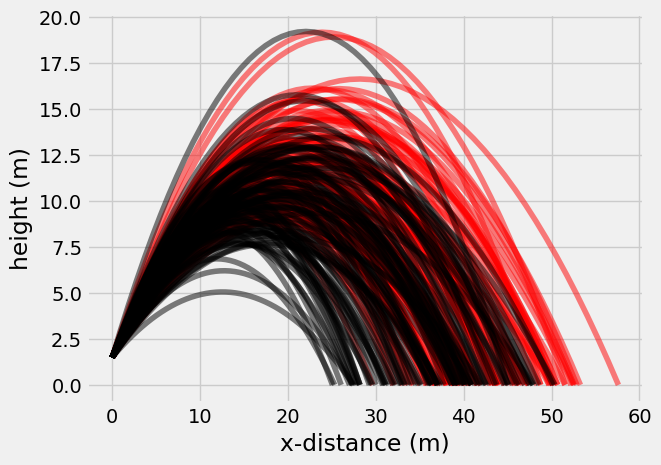

In [218]:
plt.plot(Pat_x, Pat_y, 'r-', alpha = 0.5)
plt.plot(Jim_x, Jim_y, 'k-', alpha = 0.5)
plt.xlabel('x-distance (m)')
plt.ylabel('height (m)');

In [219]:
ttest_ind(Pat_x[-1, :], Jim_x[-1, :])

TtestResult(statistic=6.290692703066104, pvalue=1.985968795860413e-09, df=198.0)

Text(0.5, 1.0, 'Pat throws 5.5 m farther than Jim\nafter 100 throws')

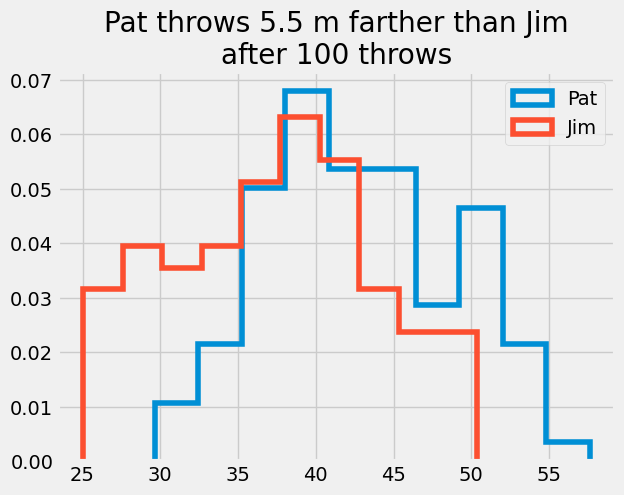

In [220]:
plt.hist(Pat_x[-1, :],
        histtype='step',
        linewidth = 4,
         label = 'Pat',
         density = True,)
        #bins = np.linspace(50,80, 31))
plt.hist(Jim_x[-1, :],
        histtype = 'step',
        linewidth = 4,
         label = 'Jim',
         density = True,)
plt.legend();
plt.title('Pat throws {:1.1f} m farther than Jim\nafter {} throws'.format(np.mean(Pat_x[-1, :]- Jim_x[-1, :]), N_throws))

## Monte Carlo Report on throwing distances

Create a technical report to detail the factors that affect throwing distance.

- What did you include in your analysis?
- Did you find any better estimates for the initial speed and angle? What was the reference?
- Which factors had a bigger impact on distance?
- What is something that should be included, but might require more research or information?

I initially attempted to add drag force within the code, but I was having trouble iterating the force to change over each time stamp when the velocity changed so that the force wasn't constant throughout for each direction. I kept a little bit of the code in with '#' in front of it as to not affect the code I currently have. It was giving me issues with the size of the matrices as well as finding a way to multiply the correct velocity component with the correct current angle to output an accurate drag value. So I decided to add an element of fatigue within the throwers that would create a different additional factor that affected the force and trajectory of the throws over time, as more throws were made.

Although drag may have potentially been a more accurate value to add to the simulation, I believe that fatigue within the user may also be quite important. This is because for many activities or exercises people eventually fatigue, it is often referenced regarding workouts or playing sports, so it seemed that this could be an interesting factor to look at. This value could also be used to show the difference between someone who throws a baseball often and someone who doesn't, since the person who throws it often would be used to this movement and wouldn't fatigue from it as fast. The value I input for fatigue was a relatively arbitrary value to see how a decreasing initial velocity over time with a similarly relatively small variation would effect the data given.

When both users have the same level of fatigue input the distribution of the spread for this example only changed by 0.3 meters in favor of Jim. Although, like I referenced earlier, if it was known that Pat threw a baseball more often than Jim and was more used to this movement we could decrease his fatigue value. If I change pats fatigue value per throw from 0.0025 to 0.002 his increase in average distance increased from 3.1m to 5.2m for 100 trials. Although, using the same values for fatigue where Pat has the advantage but I decrease the trials to only 10, they once again become much closer as the compounding fatigue effects the average much less leading to Pat having a much smaller advantage. This is interesting to look at because since the fatigue value accumulates more and more for more "trials" in this instance, it could skew the data in a way which we wouldn't normally see in a Monte Carlo since more data usually means more accuracy, but potentially wouldn't in this scinario where the more trials occur the more a specific factor comes int,o play to effect the data.

Within this example, it seems like the initial throwing velocity (input Kinetic Energy) has the biggest effect on the outcome of the trials. Although the angle at which the ball is thrown does have a huge impact, the speed which it is thrown seems to have a bigger effect. Obviously this is assuming you stay within a certian range of values and speed because if you throw the ball straight up in the air or directly onto the ground it doesn't matter how hard it is thrown as it will gain no distance. As the trials increase, the fatigue element has a much more important role, with considerably more trials, even if you throw much faster than your opponent, if you fatigue much faster as well you could still lose the average distance.

It would be cool to include real fatigue numbers if you were to put a numerical value to how much speed is lost by a large number of throws if done non-stop. This could increase the possibilities for this simulation, if you attempt to see who could more accurately throw a ball into the batting zone like in baseball with thousands of throws, fatigue would also play an effect in that test as well to potentially see how speed and accuracy would decrease over time.
